
### Enter Patient Data ###


Pregnancies (0-17):  3
Glucose Level (0-200):  198
Blood Pressure (0-122):  112
Skin Thickness (0-100):  89
Insulin Level (0-846):  800
BMI (0.0-67.0):  60
Diabetes Pedigree Function (0.0-2.4):  2
Age (21-88):  24



### Diagnosis Result ###
You are Diabetic

### Model Accuracy ###
79.22%

### Comparative Analysis ###


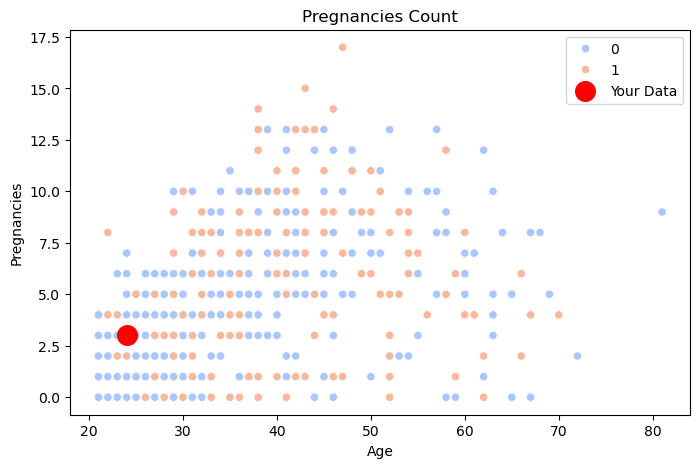

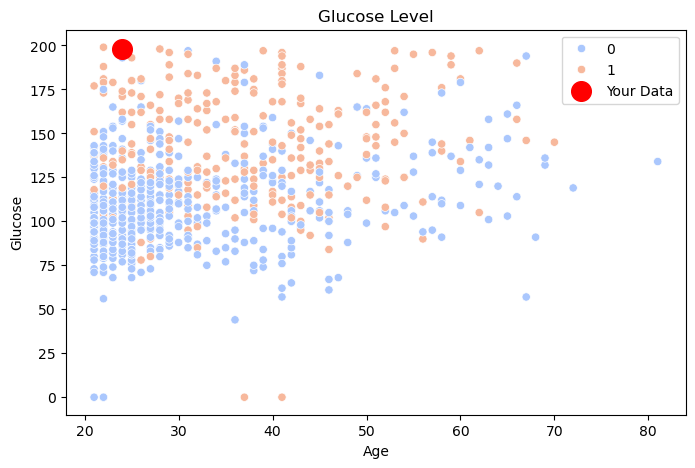

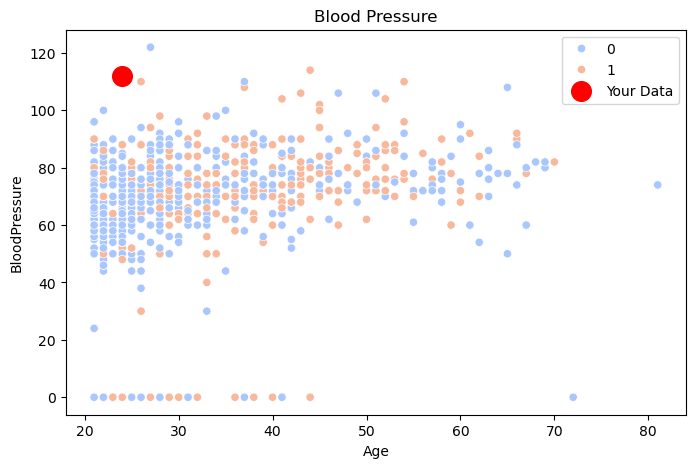

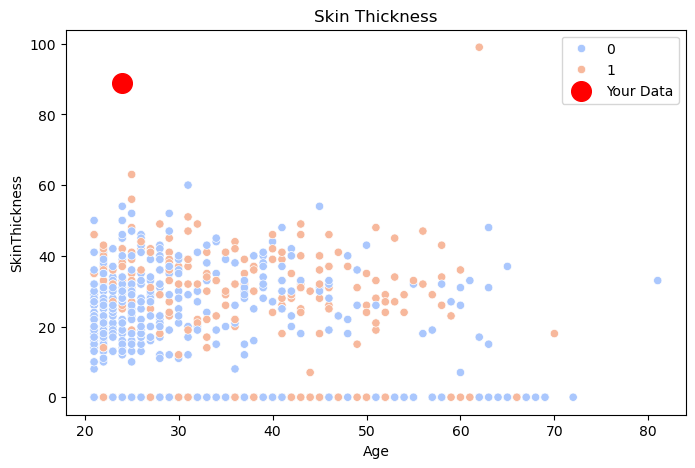

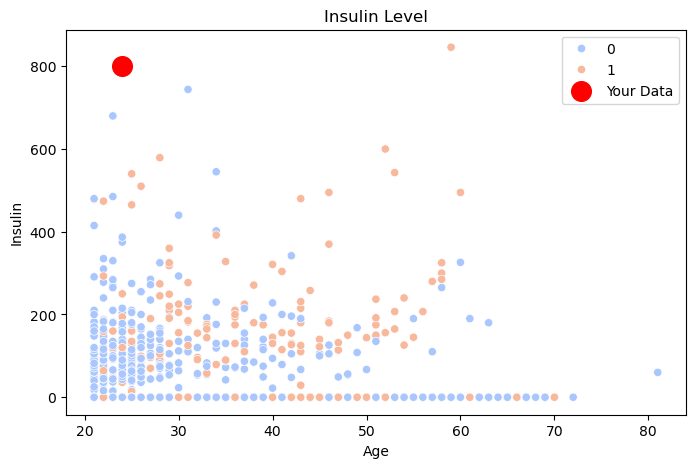

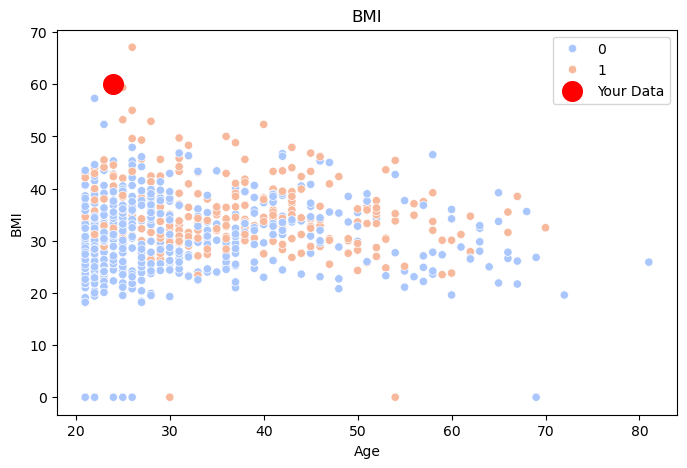

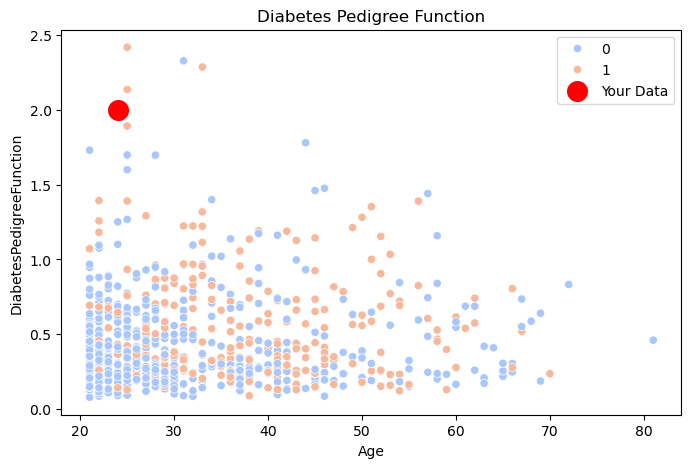

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline

# Load dataset
df = pd.read_csv("diabetes.csv")

# Splitting Data
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the trained model
pickle.dump(rf, open("diabetes_model.pkl", "wb"))

# Function to take user input
def user_report():
    print("\n### Enter Patient Data ###")
    pregnancies = int(input("Pregnancies (0-17): "))
    glucose = int(input("Glucose Level (0-200): "))
    bp = int(input("Blood Pressure (0-122): "))
    skinthickness = int(input("Skin Thickness (0-100): "))
    insulin = int(input("Insulin Level (0-846): "))
    bmi = float(input("BMI (0.0-67.0): "))
    dpf = float(input("Diabetes Pedigree Function (0.0-2.4): "))
    age = int(input("Age (21-88): "))

    user_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [bp],
        'SkinThickness': [skinthickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [dpf],
        'Age': [age]
    })
    return user_data

# Load the saved model
rf = pickle.load(open("diabetes_model.pkl", "rb"))

# Get user input
data_user = user_report()

# Prediction
user_result = rf.predict(data_user)

# OUTPUT
result_text = 'You are Diabetic' if user_result[0] == 1 else 'You are not Diabetic'
print("\n### Diagnosis Result ###")
print(result_text)

# Model Accuracy
accuracy = accuracy_score(y_test, rf.predict(X_test)) * 100
print("\n### Model Accuracy ###")
print(f"{accuracy:.2f}%")

# Visualizations
def plot_graph(x_feature, y_feature, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df['Outcome'], palette='coolwarm')
    plt.scatter(data_user[x_feature], data_user[y_feature], color='red', s=200, label="Your Data")
    plt.title(title)
    plt.legend()
    plt.show()

# Generate graphs
print("\n### Comparative Analysis ###")
plot_graph('Age', 'Pregnancies', 'Pregnancies Count')
plot_graph('Age', 'Glucose', 'Glucose Level')
plot_graph('Age', 'BloodPressure', 'Blood Pressure')
plot_graph('Age', 'SkinThickness', 'Skin Thickness')
plot_graph('Age', 'Insulin', 'Insulin Level')
plot_graph('Age', 'BMI', 'BMI')
plot_graph('Age', 'DiabetesPedigreeFunction', 'Diabetes Pedigree Function')
